# Klasifikasi Data ADASYN

## Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


## Membagi data train dan test

In [3]:
ecoli_adasyn = pd.read_csv("../dataset/ecoli_adasyn.csv")
ecoli_adasyn

,Unnamed: 0,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...,...
1150,1150,0.441816,0.414967,0.48,0.5,0.543392,0.628315,0.593501,im
1151,1151,0.576171,0.463972,0.48,0.5,0.447617,0.794114,0.791079,im
1152,1152,0.270352,0.500191,0.48,0.5,0.249075,0.490543,0.440764,im
1153,1153,0.497654,0.438041,0.48,0.5,0.536014,0.786720,0.801800,im


## Fitur Dan Target

Fitur: 
- mcg
- gvh
- lip 
- chg
- chg
- aac
- alm1
- alm2

Target:  
- class

In [4]:
fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
target = ["class"]

## Pemisahan Data
data training: **80%**  
data test: **20%**

In [5]:
X = ecoli_adasyn[fitur]
y = ecoli_adasyn[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
data_train = X_train.merge(y_train, left_index=True, right_index=True)
data_train

,mcg,gvh,lip,chg,aac,alm1,alm2,class
996,0.710212,0.667868,0.48,0.5,0.566808,0.516596,0.389152,pp
58,0.440000,0.340000,0.48,0.5,0.300000,0.330000,0.430000,cp
333,0.610000,0.600000,0.48,0.5,0.440000,0.390000,0.380000,pp
332,0.710000,0.570000,0.48,0.5,0.480000,0.350000,0.320000,pp
837,0.603369,0.620368,0.48,0.5,0.732052,0.343737,0.346999,om
...,...,...,...,...,...,...,...,...
1044,0.658106,0.684141,0.48,0.5,0.440177,0.426212,0.278459,pp
1095,0.531602,0.510996,0.48,0.5,0.492382,0.823809,0.842207,im
1130,0.562731,0.439297,0.48,0.5,0.560000,0.844096,0.818635,im
860,0.703611,0.628565,0.48,0.5,0.783611,0.430833,0.230417,om


In [7]:
data_test = X_test.merge(y_test, left_index=True, right_index=True)
data_test

,mcg,gvh,lip,chg,aac,alm1,alm2,class
964,0.627443,0.508190,0.735295,0.500000,0.529457,0.648914,0.678914,imU
265,0.730000,0.840000,0.480000,0.500000,0.860000,0.580000,0.290000,om
109,0.470000,0.280000,0.480000,0.500000,0.560000,0.200000,0.250000,cp
299,0.680000,0.820000,0.480000,0.500000,0.380000,0.650000,0.560000,pp
844,0.624848,0.536366,0.569298,0.500000,0.786565,0.474042,0.321214,om
...,...,...,...,...,...,...,...,...
1140,0.310000,0.464936,0.480000,0.500000,0.529092,0.810780,0.832468,im
850,0.649982,0.790758,0.800073,0.500000,0.804603,0.586155,0.431571,om
514,0.810342,0.522789,0.480000,0.500000,0.531803,0.563264,0.429316,imS
380,0.728877,0.482405,1.000000,0.788766,0.446471,0.617864,0.528132,imL


## Klasifikasi menggunakan Naive Bayes

In [8]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
laporan_klasifikasi = classification_report(y_test, y_pred, zero_division=0)
print(f"Akurasi Model Naive Bayes: {akurasi:.2f}")
print("\nLaporan Klasifikasi:")
print(laporan_klasifikasi)

Akurasi Model Naive Bayes: 0.84

Laporan Klasifikasi:
              precision    recall  f1-score   support

          cp       1.00      0.97      0.98        30
          im       0.88      0.52      0.65        27
         imL       1.00      1.00      1.00        31
         imS       0.94      1.00      0.97        33
         imU       0.81      0.79      0.80        33
          om       1.00      0.39      0.56        28
         omL       1.00      1.00      1.00        23
          pp       0.48      1.00      0.65        26

    accuracy                           0.84       231
   macro avg       0.89      0.83      0.83       231
weighted avg       0.89      0.84      0.83       231



d:\python\python3.11\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


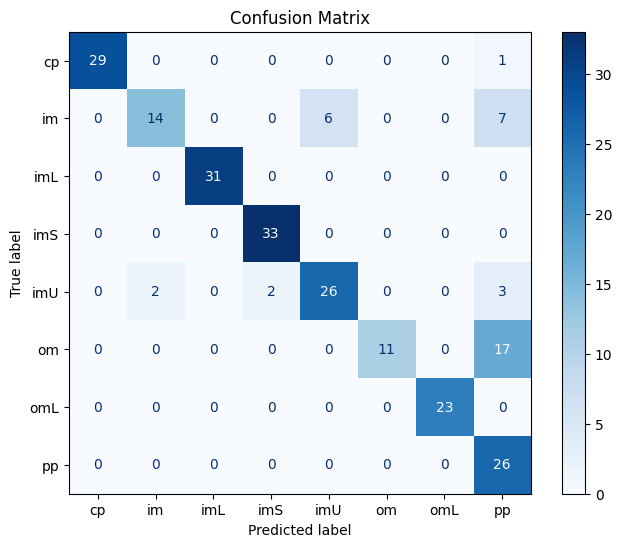

In [9]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=naive_bayes_model.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Klasifikasi dengan RandomForest

In [10]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
akurasi_random_forest = accuracy_score(y_test, y_pred_random_forest)
laporan_random_forest = classification_report(y_test, y_pred_random_forest, zero_division=0)

print(f"Akurasi: {akurasi_random_forest:.2f}")
print("Laporan random forest: \n", laporan_random_forest)

d:\python\python3.11\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Akurasi: 0.97
Laporan random forest: 
               precision    recall  f1-score   support

          cp       0.94      0.97      0.95        30
          im       0.96      0.81      0.88        27
         imL       1.00      1.00      1.00        31
         imS       1.00      1.00      1.00        33
         imU       0.89      0.97      0.93        33
          om       1.00      1.00      1.00        28
         omL       1.00      1.00      1.00        23
          pp       0.96      0.96      0.96        26

    accuracy                           0.97       231
   macro avg       0.97      0.96      0.96       231
weighted avg       0.97      0.97      0.96       231



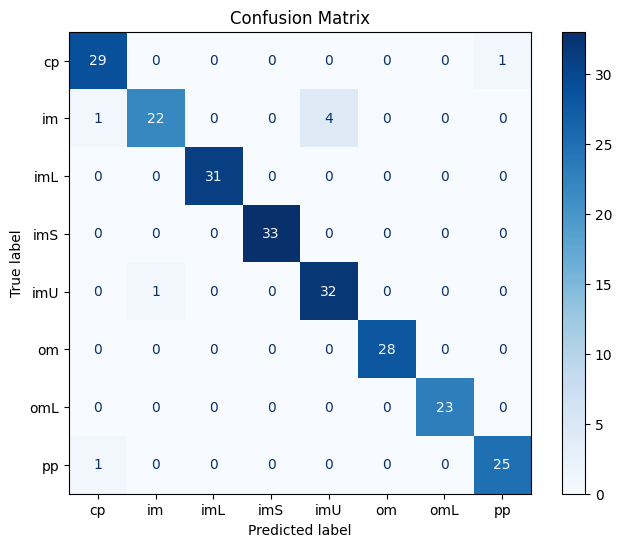

In [11]:
cm = confusion_matrix(y_test, y_pred_random_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=random_forest_model.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Bagging dengan Naive Bayes estimator

In [12]:
bagging_nb = BaggingClassifier(n_estimators=100, estimator=GaussianNB(), random_state=42)
bagging_nb.fit(X_train, y_train)
y_pred_bagging_nb = bagging_nb.predict(X_test)
akurasi_bagging_nb = accuracy_score(y_test, y_pred_bagging_nb)
laporan_bagging_nb = classification_report(y_test, y_pred_bagging_nb, zero_division=0)
print(f"Akurasi: {akurasi_bagging_nb:.2f}")
print("Laporan bagging NB: \n", laporan_bagging_nb)


d:\python\python3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.84
Laporan bagging NB: 
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        30
          im       0.88      0.52      0.65        27
         imL       1.00      1.00      1.00        31
         imS       0.94      1.00      0.97        33
         imU       0.81      0.79      0.80        33
          om       1.00      0.43      0.60        28
         omL       1.00      1.00      1.00        23
          pp       0.49      1.00      0.66        26

    accuracy                           0.84       231
   macro avg       0.89      0.84      0.83       231
weighted avg       0.89      0.84      0.84       231



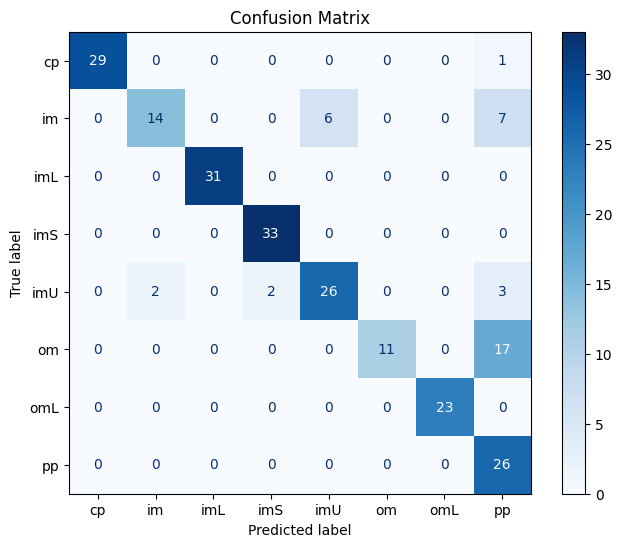

In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=bagging_nb.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Bagging menggunakan DecissionTree estimator

In [14]:
bagging_dt = BaggingClassifier(n_estimators=100, estimator=DecisionTreeClassifier(), random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)
akurasi_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
laporan_bagging_dt = classification_report(y_test, y_pred_bagging_dt)
print(f"Akurasi: {akurasi_bagging_dt:.2f}")
print("Laporan random forest: \n", laporan_bagging_dt)

d:\python\python3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.95
Laporan random forest: 
               precision    recall  f1-score   support

          cp       0.94      0.97      0.95        30
          im       0.85      0.85      0.85        27
         imL       1.00      1.00      1.00        31
         imS       0.97      1.00      0.99        33
         imU       0.90      0.85      0.88        33
          om       1.00      0.96      0.98        28
         omL       0.96      1.00      0.98        23
          pp       0.96      0.96      0.96        26

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



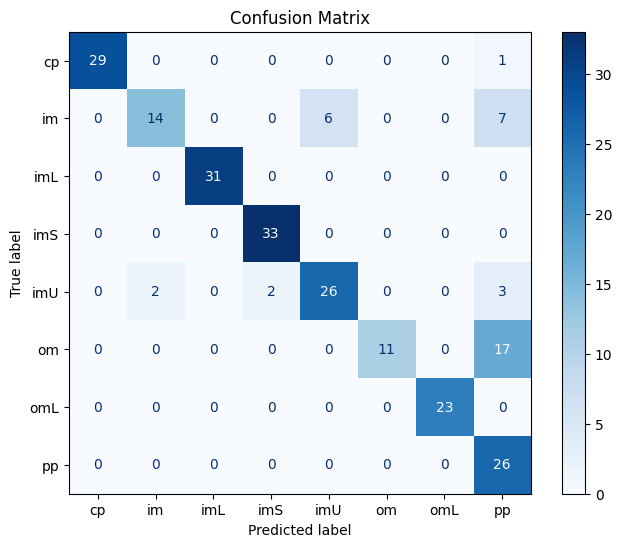

In [15]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=bagging_dt.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Table Perbandingan Model

In [16]:
akurasi_table = pd.DataFrame(
    [
     ["Naive Bayes", akurasi],
     ["Random Forest", akurasi_random_forest],
     ["Bagging Naive Bayes", akurasi_bagging_nb],
     ["Bagging Decission Tree", akurasi_bagging_dt]
    ],
    columns=["Model", "Akurasi Model"],
    index=None
)

akurasi_table.style.hide(axis="index").format({
    "Akurasi Model": "{:.3f}"
})

Model,Akurasi Model
Naive Bayes,0.835
Random Forest,0.965
Bagging Naive Bayes,0.840
Bagging Decission Tree,0.948
